In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import KFold
from statsmodels.regression.linear_model import OLS


In [6]:
df = pd.read_csv("clean_fin.csv")
pd.set_option('display.max_columns', None)

In [7]:
df

,State,City,Latitude,Longitude,PM2.5 Min,PM2.5 Max,PM2.5 Avg,PM10_Min,PM10_Max,PM10_Avg,NO2_Min,NO2_Max,NO2_Avg,SO2_Min,SO2_Max,SO2_Avg,CO_Min,CO_Max,CO_Avg,OZONE_Min,OZONE_Max,OZONE_Avg,AQI Value,Predominant_Parameter
0,Andhra Pradesh,Amravati,16.515083,80.518167,2.0,17.0,9.0,13.0,38.0,23.0,5.0,9.0,7.0,10.0,15.0,13.0,3.0,34.0,18.0,1.0,26.0,22.0,23,PM10
1,Andhra Pradesh,Anantpur,14.675886,77.593027,39.0,61.0,51.0,41.0,66.0,54.0,26.0,49.0,33.0,6.0,14.0,11.0,10.0,20.0,20.0,8.0,39.0,31.0,54,PM10
2,Andhra Pradesh,Chittor,13.204880,79.097889,21.0,314.0,88.0,19.0,173.0,68.0,10.0,15.0,13.0,2.0,3.0,3.0,6.0,10.0,6.0,21.0,43.0,34.0,88,PM2.5
3,Andhra Pradesh,Kadapa,14.465052,78.824187,28.0,47.0,38.0,30.0,49.0,40.0,15.0,29.0,21.0,14.0,16.0,15.0,26.0,30.0,30.0,30.0,30.0,30.0,40,PM10
4,Andhra Pradesh,Rajamahendravaram,16.987287,81.736318,5.0,19.0,12.0,14.0,31.0,21.0,3.0,21.0,11.0,8.0,12.0,10.0,10.0,32.0,17.0,6.0,7.0,6.0,21,PM10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,West Bengal,Kolkata,22.499290,88.369170,132.0,260.0,189.0,117.0,167.0,140.0,12.0,68.0,26.0,3.0,19.0,9.0,17.0,43.0,24.0,18.0,82.0,65.0,189,PM2.5
457,West Bengal,Kolkata,22.627847,88.380669,70.0,96.0,83.0,81.0,111.0,98.0,18.0,37.0,26.0,9.0,14.0,10.0,28.0,40.0,31.0,24.0,97.0,81.0,98,PM10
458,West Bengal,Kolkata,22.511060,88.351420,51.0,107.0,76.0,51.0,101.0,80.0,17.0,73.0,36.0,5.0,41.0,19.0,20.0,40.0,25.0,25.0,119.0,86.0,86,OZONE
459,West Bengal,Kolkata,22.544808,88.340369,60.0,166.0,103.0,95.0,134.0,117.0,25.0,35.0,28.0,2.0,7.0,4.0,36.0,100.0,54.0,11.0,81.0,60.0,117,PM10


Since we are to form 3 different linear models for our given project, it would be better if form a function for linear regression that could be utilised everytime we want to perform linear regression . Also, it makes the code less complex and easier to read.

We will also be validating our model. Cross Validation:- Cross Validation is a technique which involves reserving a particular sample of a dataset on which we do not train the model. Later, we will test our model on this sample before finalizing it.

We will be performing K-Fold Cross Validation.Below are the steps for it:

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error you see on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model



In [42]:
def linear_regression(X,y):
#SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

#Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)

    print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)
    print('r2_Square:%.2f '% r2_score(y_test, predictions))
    print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))
    print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(LR,X_train,y_train,cv=10).mean())
    
    regressor_OLS = sm.OLS(y_train, X_train).fit()
    
    plt.figure(figsize=(18,10))
    plt.scatter(predictions,y_test,alpha = 0.3)
    plt.plot(predictions, predictions, color='red', linewidth=2)
    plt.xlabel('Predictions')
    plt.ylabel('AQI')
    plt.title("Linear Prediction ")
    plt.show()
#cross validation    
    Kfold = KFold(len(X), shuffle=True)
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.transform(X_test)
    z=print(regressor_OLS.summary())
    return z


In [47]:
####function to calculate cross validation score only
def cross_val(X,y):
    #SPLIT TEST AND TRAIN
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#One Hot Encoding
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

#Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions = LR.predict(X_test)
    Kfold = KFold(len(X), shuffle=True)
    print("KfoldCrossVal mean score using Linear regression is %s" %cross_val_score(LR,X_train,y_train,cv=10).mean())
    

The Following plot gives us our first Linear Model along with the summary for the same.

>Training Features :- PM2.5 Avg, PM10_Avg, NO2_Avg, SO2_Avg, CO_Avg, OZONE_Avg

>Target Feature:- AQI Value


(93, 6) (368, 6) (93,) (368,)
r2_Square:0.82 
MSE:19.73 
KfoldCrossVal mean score using Linear regression is 0.8304926620871557


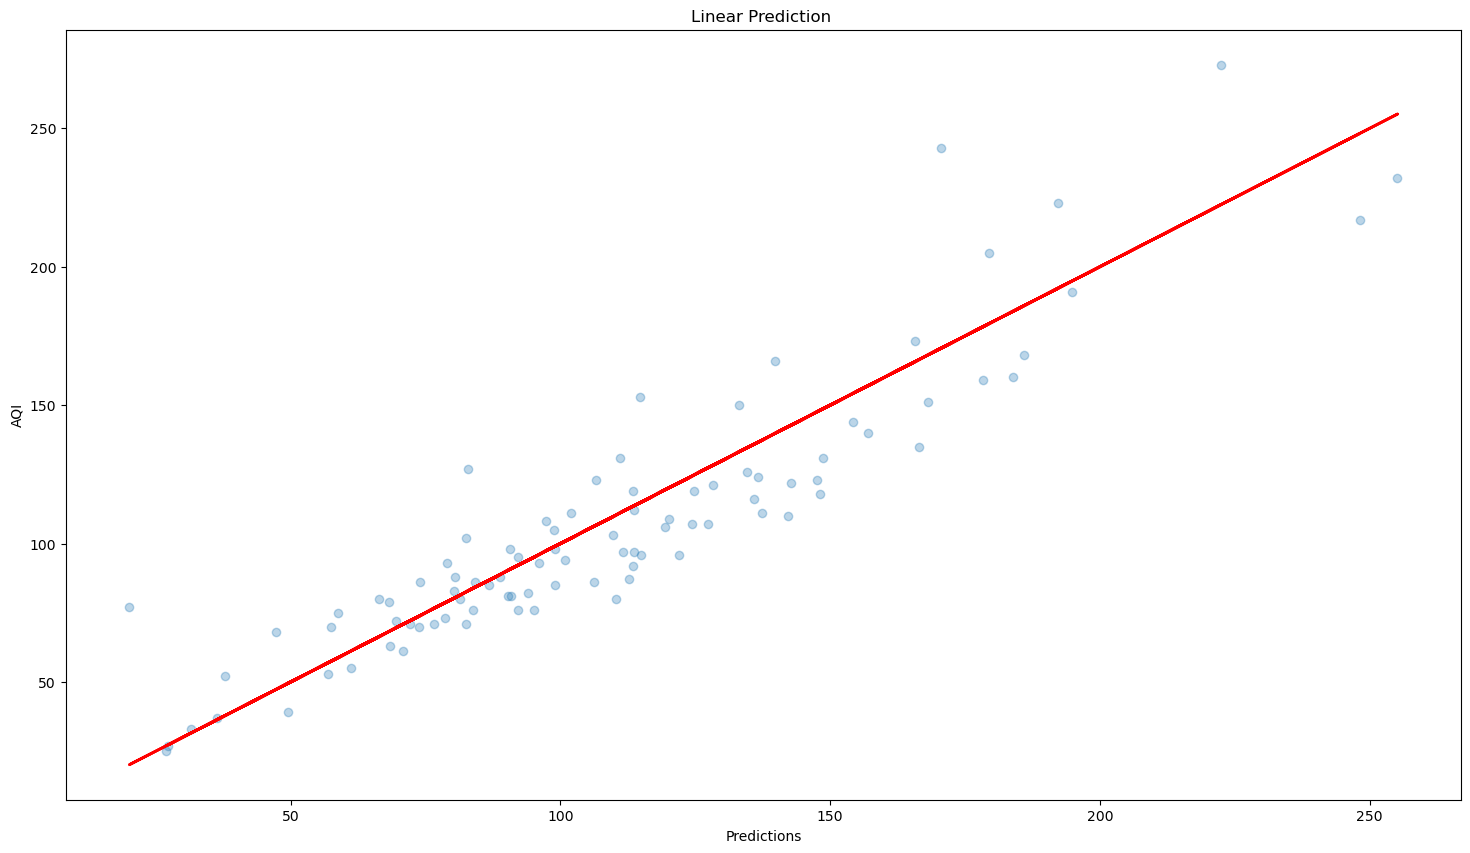

                                 OLS Regression Results                                
Dep. Variable:              AQI Value   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              2214.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):                   7.98e-282
Time:                        21:31:59   Log-Likelihood:                         -1606.9
No. Observations:                 368   AIC:                                      3226.
Df Residuals:                     362   BIC:                                      3249.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
X_1=df[['PM2.5 Avg', 'PM10_Avg', 'NO2_Avg', 'SO2_Avg', 'CO_Avg', 'OZONE_Avg']]
y_1=df['AQI Value']
linear_regression(X_1,y_1)

The Following plot gives us our first Linear Model along with the summary for the same.

>Training Features :- PM2.5 Min, PM10_Min, NO2_Min, SO2_Min, CO_Min, OZONE_Min

>Target Feature:- AQI Value

(93, 6) (368, 6) (93,) (368,)
r2_Square:0.32 
MSE:38.76 
KfoldCrossVal mean score using Linear regression is 0.4063871638997597


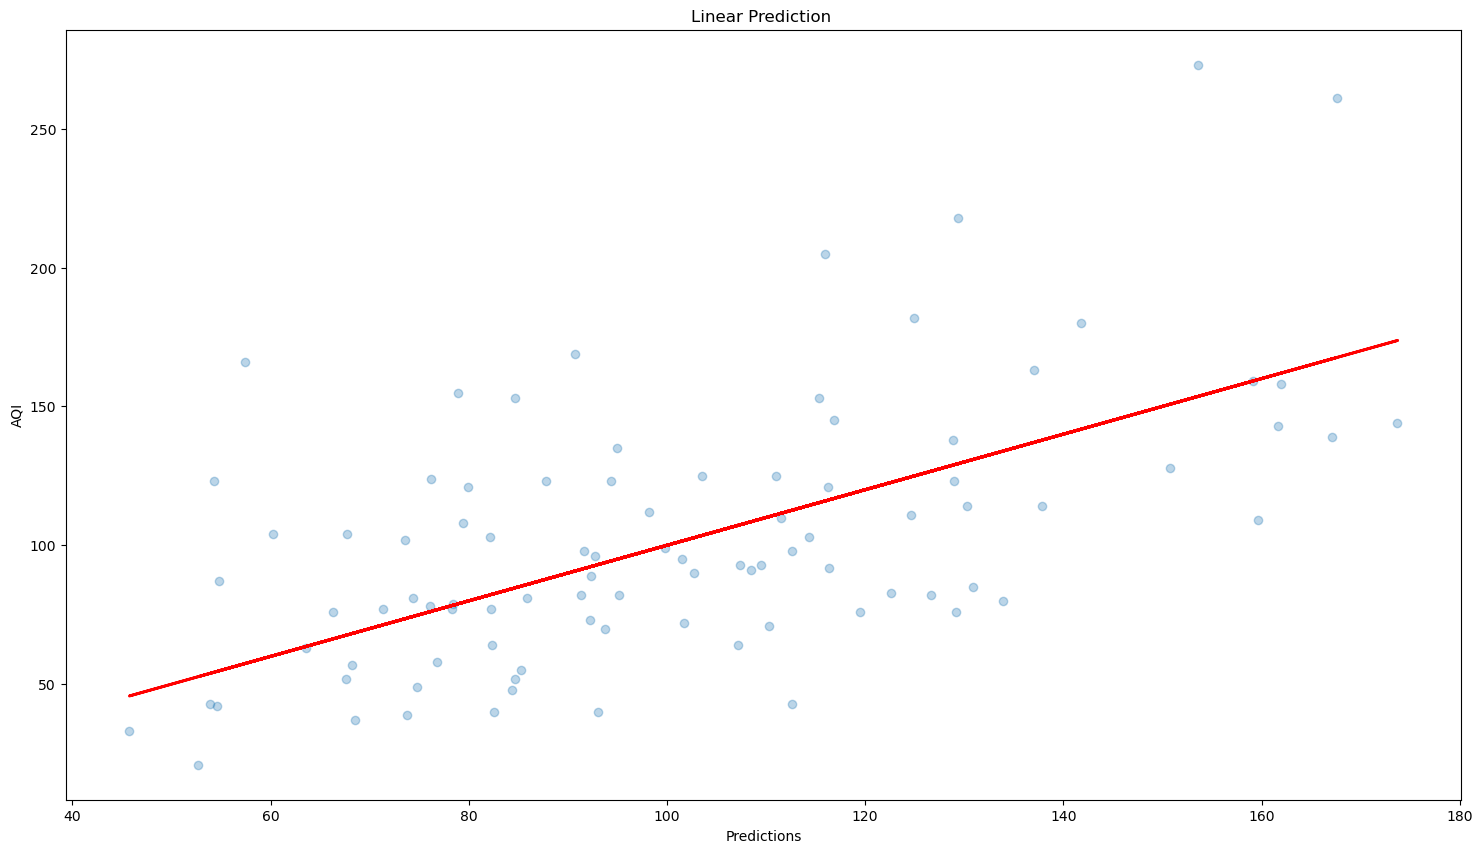

                                 OLS Regression Results                                
Dep. Variable:              AQI Value   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              469.2
Date:                Wed, 26 Mar 2025   Prob (F-statistic):                   2.37e-167
Time:                        21:32:06   Log-Likelihood:                         -1877.9
No. Observations:                 368   AIC:                                      3768.
Df Residuals:                     362   BIC:                                      3791.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
X_2=df[['PM2.5 Min', 'PM10_Min', 'NO2_Min', 'SO2_Min', 'CO_Min', 'OZONE_Min']]
y_2=df['AQI Value']
linear_regression(X_2,y_2)

The Following plot gives us our first Linear Model along with the summary for the same.

>Training Features :- PM2.5 Max, PM10_Max, NO2_Max, SO2_Max, CO_Max, OZONE_Max

>Target Feature:- AQI Value

(93, 6) (368, 6) (93,) (368,)
r2_Square:0.60 
MSE:29.08 
KfoldCrossVal mean score using Linear regression is 0.6227837641495417


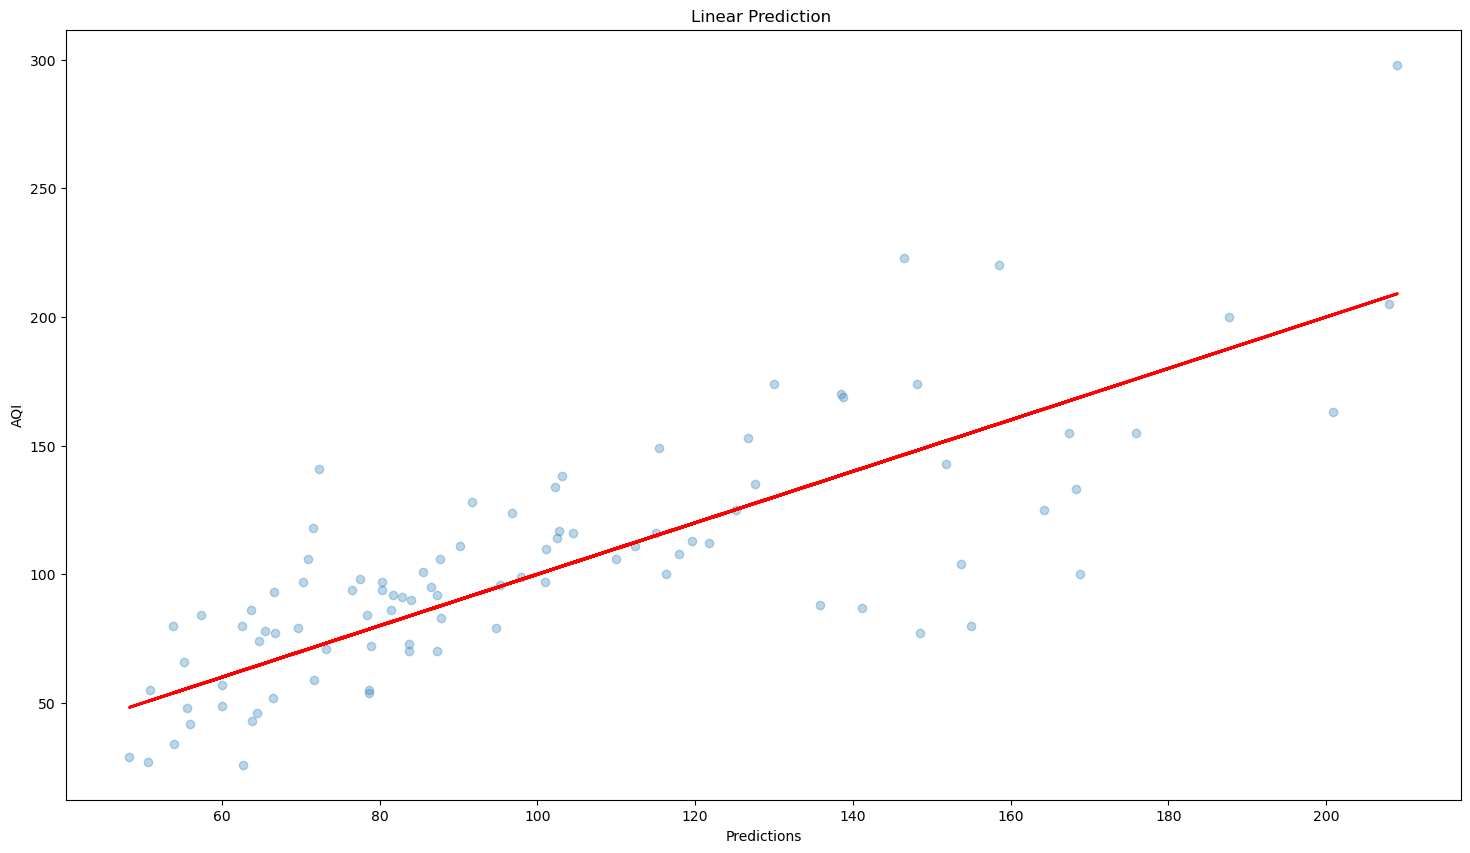

                                 OLS Regression Results                                
Dep. Variable:              AQI Value   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              801.3
Date:                Wed, 26 Mar 2025   Prob (F-statistic):                   1.40e-205
Time:                        21:32:17   Log-Likelihood:                         -1788.0
No. Observations:                 368   AIC:                                      3588.
Df Residuals:                     362   BIC:                                      3612.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [50]:
X_3=df[['PM2.5 Max', 'PM10_Max', 'NO2_Max', 'SO2_Max', 'CO_Max', 'OZONE_Max']]
y_3=df['AQI Value']
linear_regression(X_3,y_3)

## <p style="text-align: center;">4. Multicollinearity</p> <a id='Multicollinearity'></a>

In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.

Why Multicollinearity is a problem?
>Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

VIF assesses whether factors are correlated to each other (multicollinearity)
High variance inflation factor means that they "have" the same variance within this dataset. We would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity.
If the VIF is equal to 1 there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be moderately correlated. If the VIF for a factor is near or above 5 we may have to remove highly correlated factors.

In [36]:
def variance_IF(X):
    vif=vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif


In [38]:
##For first Linear Model
variance_IF(X_1)##For second Linear Model
variance_IF(X_2)

,VIF Factor,features
0,7.596096,PM2.5 Avg
1,12.923147,PM10_Avg
2,3.092593,NO2_Avg
3,2.602151,SO2_Avg
4,3.503953,CO_Avg
5,3.099130,OZONE_Avg


In [39]:
##For second Linear Model
variance_IF(X_2)

,VIF Factor,features
0,5.102153,PM2.5 Min
1,6.949200,PM10_Min
2,2.166919,NO2_Min
3,1.885692,SO2_Min
4,2.726897,CO_Min
5,1.926023,OZONE_Min


In [40]:
##For third Linear Model
variance_IF(X_3)

,VIF Factor,features
0,6.635885,PM2.5 Max
1,7.620970,PM10_Max
2,3.211874,NO2_Max
3,2.595060,SO2_Max
4,5.324564,CO_Max
5,3.328918,OZONE_Max


## Significant Questions based on the 3 linear models:

1. Which summary statistic (average, minimum, or maximum) of pollutant concentrations is the best predictor of overall Air Quality Index (AQI)?

A higher R-squared and lower RMSE indicate a better fit and a more accurate model. Therefore Average is the best model.
    
2. For each model, which specific pollutants have the most significant impact on AQI?

   PM2.5 and PM10

4. Do all pollutants have a positive relationship with AQI, or do some have a negative relationship?

   Only no2 has a negative sign. 

6. How much of the variance in AQI can be explained by each set of pollutant concentrations (average, minimum, maximum)?
